In [1]:
!pip install pandas
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



C:\Users\saisv\AppData\Local\Temp\ipykernel_20432\201274082.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
data = pd.read_csv(r"C:\Users\saisv\Documents\cardiovascular\cardiovascular\heart_disease.csv")

In [3]:
data.head(10)

age  sex  cp  trestbps  glucose   BMI  chol  fbs  restecg  thalach  exang  \
0   52    1   0       125       85  21.2   212    0        1      168      0   
1   53    1   0       140      100  20.3   203    1        0      155      1   
2   70    1   0       145      105  17.4   174    0        1      125      1   
3   61    1   0       148      108  20.3   203    0        1      161      0   
4   62    0   0       138       98  29.4   294    1        1      106      0   
5   58    1   0       114       74  31.8   318    0        2      140      0   
6   55    1   0       160      120  28.9   289    0        0      145      1   
7   46    1   0       120       80  24.9   249    0        0      144      0   
8   54    1   0       122       82  28.6   286    0        0      116      1   
9   43    0   0       132       92  34.1   341    1        0      136      1   

   oldpeak  slope  ca  thal  target  
0      1.0      2   2     3       0  
1      3.1      0   0     3       0  
2      2.6      0   0     3       0  
3      0.0      2   1     3       0  
4      1.9      1   3     2       0  
5      4.4      0   3     1       0  
6      0.8      1   1     3       0  
7      0.8      2   0     3       0  
8      3.2      1   2     2       0  
9      3.0      1   0     3       0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   glucose   1025 non-null   int64  
 5   BMI       1025 non-null   float64
 6   chol      1025 non-null   int64  
 7   fbs       1025 non-null   int64  
 8   restecg   1025 non-null   int64  
 9   thalach   1025 non-null   int64  
 10  exang     1025 non-null   int64  
 11  oldpeak   1025 non-null   float64
 12  slope     1025 non-null   int64  
 13  ca        1025 non-null   int64  
 14  thal      1025 non-null   int64  
 15  target    1025 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 128.2 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
glucose     0
BMI         0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

age          sex           cp     trestbps      glucose  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.611707    91.611707   
std       9.072290     0.460373     1.029641    17.516718    17.516718   
min      29.000000     0.000000     0.000000    94.000000    54.000000   
25%      48.000000     0.000000     0.000000   120.000000    80.000000   
50%      56.000000     1.000000     1.000000   130.000000    90.000000   
75%      61.000000     1.000000     2.000000   140.000000   100.000000   
max      77.000000     1.000000     3.000000   200.000000   160.000000   

               BMI        chol          fbs      restecg      thalach  \
count  1025.000000  1025.00000  1025.000000  1025.000000  1025.000000   
mean     24.600000   246.00000     0.149268     0.529756   149.114146   
std       5.159251    51.59251     0.356527     0.527878    23.005724   
min      12.600000   126.00000     0.000000     0.000000    71.000000   
25%      21.100000   211.00000     0.000000     0.000000   132.000000   
50%      24.000000   240.00000     0.000000     1.000000   152.000000   
75%      27.500000   275.00000     0.000000     1.000000   166.000000   
max      56.400000   564.00000     1.000000     2.000000   202.000000   

             exang      oldpeak        slope           ca         thal  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.336585     1.071512     1.385366     0.754146     2.323902   
std       0.472772     1.175053     0.617755     1.030798     0.620660   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     2.000000   
50%       0.000000     0.800000     1.000000     0.000000     2.000000   
75%       1.000000     1.800000     2.000000     1.000000     3.000000   
max       1.000000     6.200000     2.000000     4.000000     3.000000   

            target  
count  1025.000000  
mean      0.513171  
std       0.500070  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

Exploratory Data Analysis (EDA)

1    526
0    499
Name: target, dtype: int64


C:\Users\saisv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


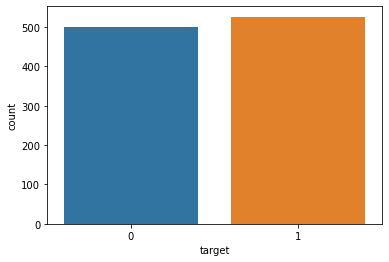

In [7]:
y = data["target"]
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

In [8]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [9]:
data["sex"].unique()

array([1, 0], dtype=int64)

312
713


C:\Users\saisv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


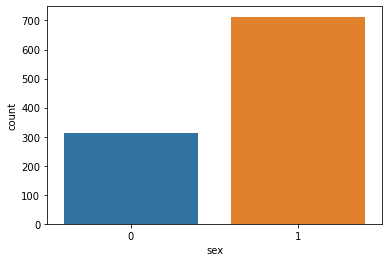

In [10]:

ax = sns.countplot(data["sex"])
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1]);
print(countFemale)
print(countMale)

Here '0' means the number of female patients and '1' means the total number of male patients

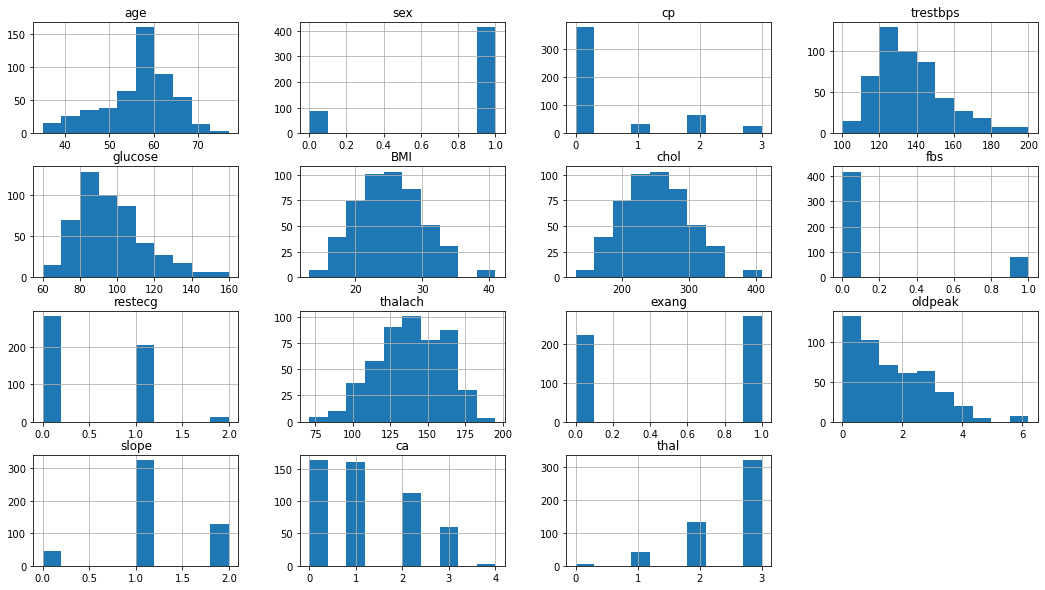

In [11]:
df=data[data.target!=1]
df=df.drop('target',axis=1)
df.hist(figsize=(18,10))
plt.show()

In [12]:
df=data[data.target!=0]

In [13]:
df

age  sex  cp  trestbps  glucose   BMI  chol  fbs  restecg  thalach  \
499    58    0   0       100       60  24.8   248    0        0      122   
500    71    0   0       112       72  14.9   149    0        1      125   
501    34    0   1       118       78  21.0   210    0        1      192   
502    34    0   1       118       78  21.0   210    0        1      192   
503    51    0   2       140      100  30.8   308    0        0      142   
...   ...  ...  ..       ...      ...   ...   ...  ...      ...      ...   
1020   45    1   1       128       88  30.8   308    0        0      170   
1021   44    0   2       108       68  14.1   141    0        1      175   
1022   47    1   0       112       72  20.4   204    0        1      143   
1023   59    1   1       140      100  22.1   221    0        1      164   
1024   50    0   0       110       70  25.4   254    0        0      159   

      exang  oldpeak  slope  ca  thal  target  
499       0      1.0      1   0     2       1  
500       0      1.6      1   0     2       1  
501       0      0.7      2   0     2       1  
502       0      0.7      2   0     2       1  
503       0      1.5      2   1     2       1  
...     ...      ...    ...  ..   ...     ...  
1020      0      0.0      2   0     2       1  
1021      0      0.6      1   0     2       1  
1022      0      0.1      2   0     2       1  
1023      1      0.0      2   0     2       1  
1024      0      0.0      2   0     2       1  

[526 rows x 16 columns]

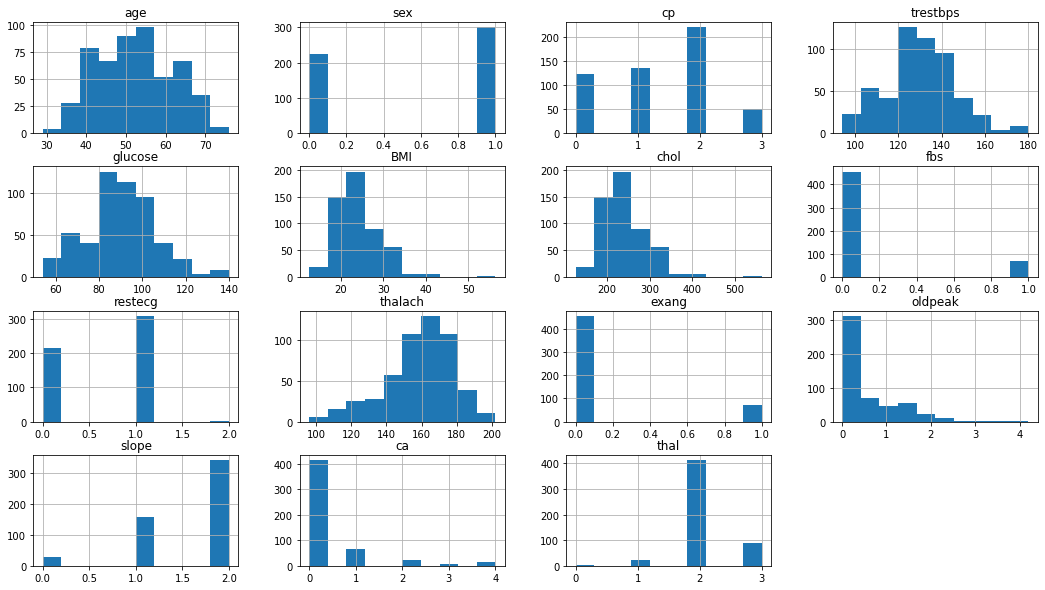

In [14]:
df=df.drop('target',axis=1)
df.hist(figsize=(18,10))
plt.show()

In [ ]:
# x axis represents readings , y axis represents no.of people (for the above graphs)

<AxesSubplot:>

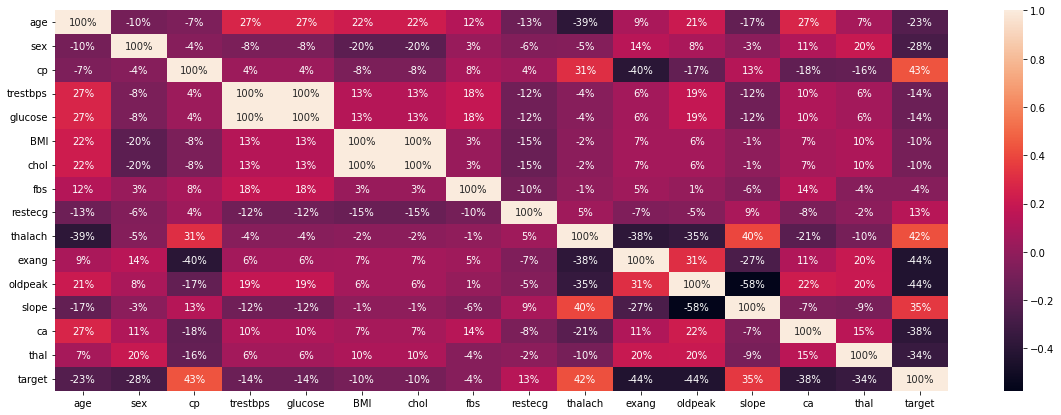

In [15]:
plt.figure(figsize=(20,7))


sns.heatmap(data.corr(),annot=True,fmt='.0%')

After doing explorative data analysis I have obtained the correlation matrix which correlate the attributes of the data set.
It is obvious that one of the main triggers of heart disease is those variables, such as chests pain type (ca), thalium heart scan(thal), and slope.

Here '0' means the number of  patients without heart disease and represented by blue color and '1' means the total number of  patients with heart disease and represented by orange color. Pairplot shows how the features are related with each others to form the output results.

In [16]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Heart Disease Frequency for ages

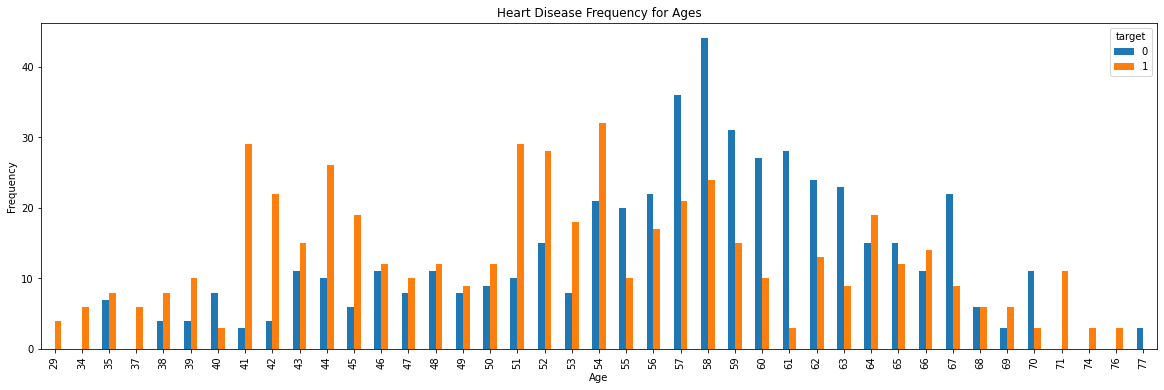

In [17]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

the likelihood of having cardiovascular diseases (CVDs) is not restricted to age alone [5]. This disease affects young people as well and is brought on by numerous different reasons.

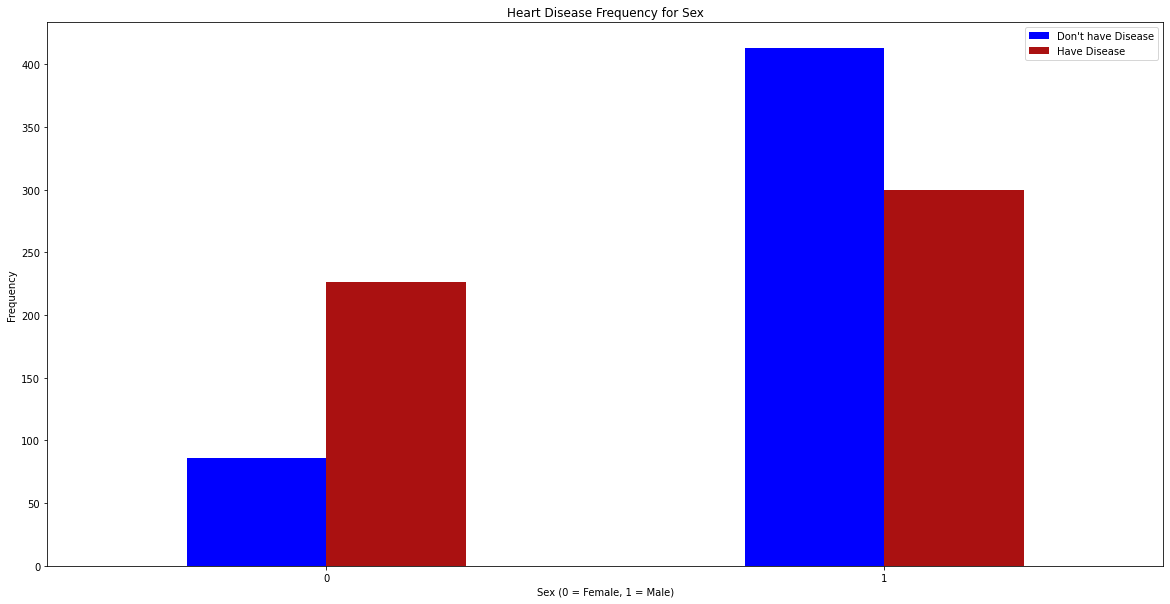

In [18]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

In [19]:
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 412, 1: 408})

In [21]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 71  16]
 [ 13 105]]


Accuracy of Logistic Regression: 85.85365853658537 

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        87
           1       0.87      0.89      0.88       118

    accuracy                           0.86       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.86      0.86       205



In [22]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[72 15]
 [21 97]]


Accuracy of Naive Bayes model: 82.4390243902439 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        87
           1       0.87      0.82      0.84       118

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.83      0.82      0.83       205



In [23]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 78   9]
 [ 12 106]]


Accuracy of Random Forest: 89.75609756097562 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        87
           1       0.92      0.90      0.91       118

    accuracy                           0.90       205
   macro avg       0.89      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [24]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[76 11]
 [24 94]]


Accuracy of K-NeighborsClassifier: 82.92682926829268 

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        87
           1       0.90      0.80      0.84       118

    accuracy                           0.83       205
   macro avg       0.83      0.84      0.83       205
weighted avg       0.84      0.83      0.83       205



In [25]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 82   5]
 [  8 110]]


Accuracy of DecisionTreeClassifier: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        87
           1       0.96      0.93      0.94       118

    accuracy                           0.94       205
   macro avg       0.93      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [26]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 83   4]
 [  8 110]]


Accuracy of Support Vector Classifier: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.96      0.93      0.95       118

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [27]:
!pip install shap

In [28]:
import shap

In [29]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.02, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 80   7]
 [ 14 104]]


Accuracy of Extreme Gradient Boost: 89.75609756097562 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        87
           1       0.94      0.88      0.91       118

    accuracy                           0.90       205
   macro avg       0.89      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [30]:
from sklearn.metrics import roc_curve

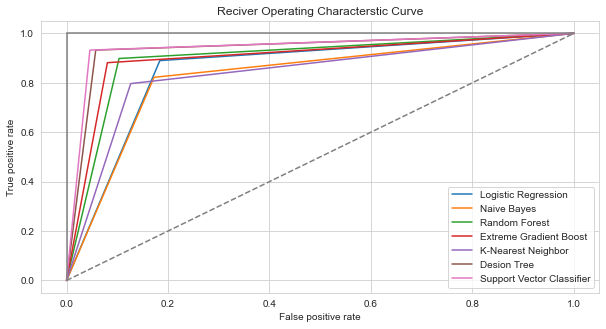

In [31]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [32]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  85.853659
1             Naive Bayes  82.439024
2           Random Forest  89.756098
3  Extreme Gradient Boost  89.756098
4     K-Nearest Neighbour  82.926829
5           Decision Tree  93.658537
6  Support Vector Machine  94.146341

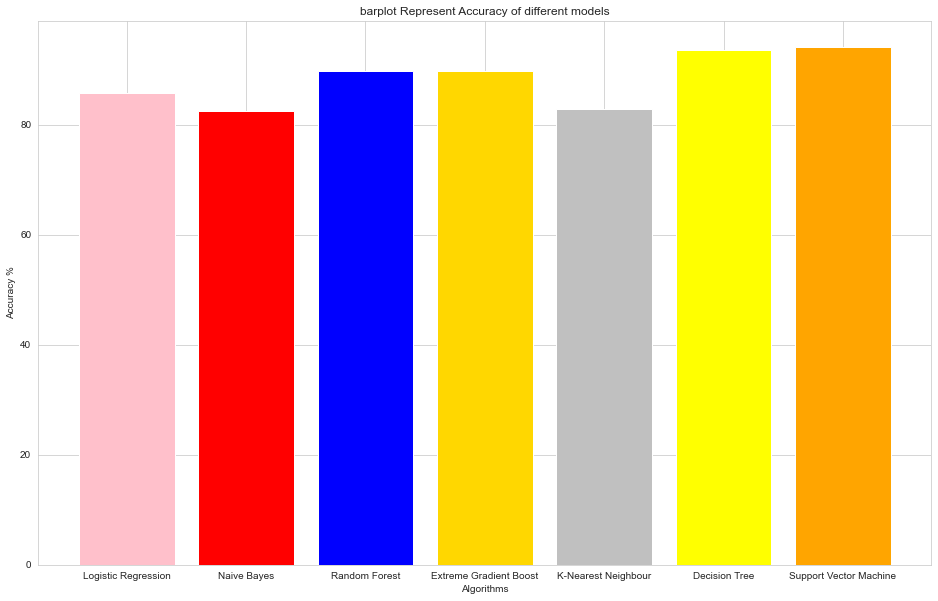

In [33]:
colors = ['pink','red','blue','gold','silver','yellow','orange']
plt.figure(figsize=(16,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [34]:
from mlxtend.classifier import StackingCVClassifier

scv1=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier=svc,cv=4,random_state=42)
scv1.fit(X_train,y_train)
scv1_predicted = scv1.predict(X_test)
scv1_conf_matrix = confusion_matrix(y_test, scv1_predicted)
scv1_acc_score = accuracy_score(y_test, scv1_predicted)
print("confussion matrix")
print(scv1_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv1_acc_score*100,'\n')
print(classification_report(y_test,scv1_predicted))

confussion matrix
[[ 83   4]
 [  8 110]]


Accuracy of StackingCVClassifier: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.96      0.93      0.95       118

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [35]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','StackingCVClassifier'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,scv1_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  85.853659
1             Naive Bayes  82.439024
2           Random Forest  89.756098
3  Extreme Gradient Boost  89.756098
4     K-Nearest Neighbour  82.926829
5           Decision Tree  93.658537
6  Support Vector Machine  94.146341
7    StackingCVClassifier  94.146341

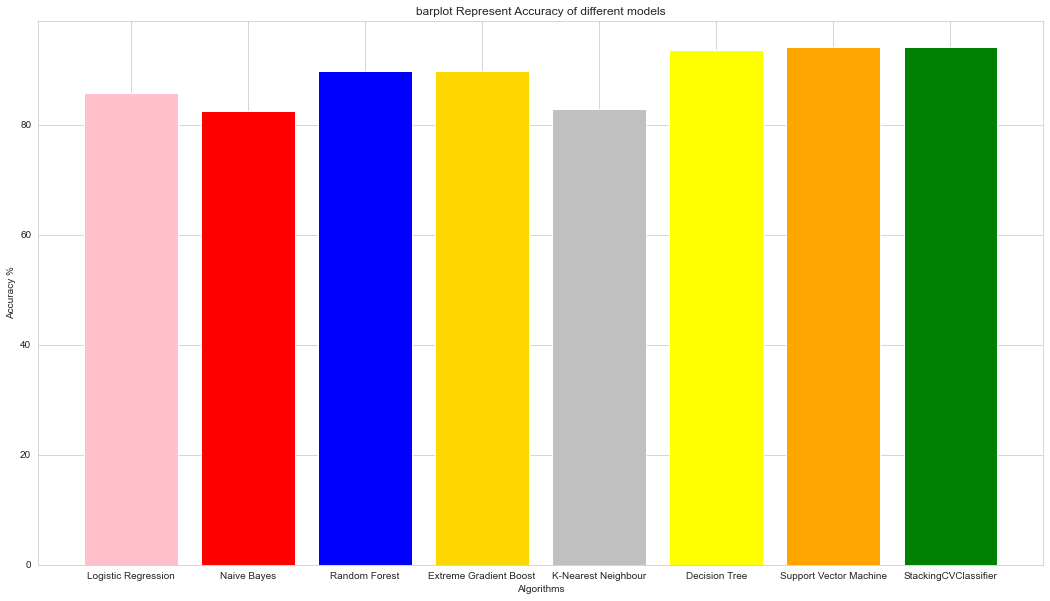

In [36]:
colors = ['pink','red','blue','gold','silver','yellow','orange','green']
plt.figure(figsize=(18,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [37]:
scv2=StackingCVClassifier(classifiers=[xgb,svc,lr],meta_classifier= svc,cv=4,random_state=42)
scv2.fit(X_train,y_train)
scv2_predicted = scv2.predict(X_test)
scv2_conf_matrix = confusion_matrix(y_test, scv2_predicted)
scv2_acc_score = accuracy_score(y_test, scv2_predicted)
print("confussion matrix")
print(scv2_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv2_acc_score*100,'\n')
print(classification_report(y_test,scv1_predicted))

confussion matrix
[[ 83   4]
 [  8 110]]


Accuracy of StackingCVClassifier: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.96      0.93      0.95       118

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [38]:
scv3=StackingCVClassifier(classifiers=[knn,svc,nb],meta_classifier= svc,cv=4,random_state=42)
scv3.fit(X_train,y_train)
scv3_predicted = scv3.predict(X_test)
scv3_conf_matrix = confusion_matrix(y_test, scv3_predicted)
scv3_acc_score = accuracy_score(y_test, scv3_predicted)
print("confussion matrix")
print(scv3_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv3_acc_score*100,'\n')
print(classification_report(y_test,scv3_predicted))

confussion matrix
[[ 83   4]
 [  8 110]]


Accuracy of StackingCVClassifier: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.96      0.93      0.95       118

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [39]:
scv4=StackingCVClassifier(classifiers=[lr,nb,rf],meta_classifier= svc,cv=4,random_state=42)
scv4.fit(X_train,y_train)
scv4_predicted = scv4.predict(X_test)
scv4_conf_matrix = confusion_matrix(y_test, scv4_predicted)
scv4_acc_score = accuracy_score(y_test, scv4_predicted)

scv5=StackingCVClassifier(classifiers=[rf,svc,knn],meta_classifier= svc,cv=4,random_state=42)
scv5.fit(X_train,y_train)
scv5_predicted = scv5.predict(X_test)
scv5_conf_matrix = confusion_matrix(y_test, scv5_predicted)
scv5_acc_score = accuracy_score(y_test, scv5_predicted)


In [40]:
model_ev = pd.DataFrame({'Model': ['lr,nb,rf','knn,svc,nb','rf,svc,knn','xgb,svc,lr','xgb,svc,knn'], 'Accuracy': [scv4_acc_score*100,
                    scv3_acc_score*100,scv5_acc_score*100,scv2_acc_score*100,scv1_acc_score*100]})
model_ev

Model   Accuracy
0     lr,nb,rf  89.756098
1   knn,svc,nb  94.146341
2   rf,svc,knn  92.195122
3   xgb,svc,lr  94.146341
4  xgb,svc,knn  94.146341

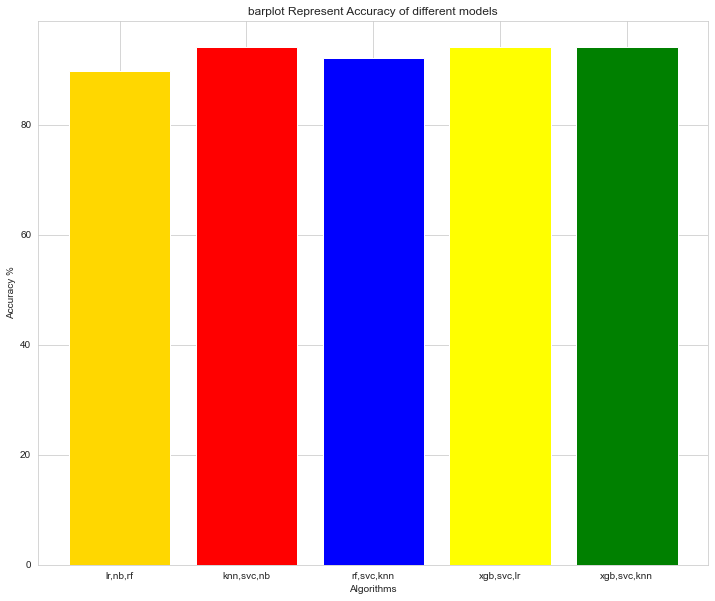

In [41]:
colors = ['gold','red','blue','yellow','green']
plt.figure(figsize=(12,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [42]:
scv_12=StackingCVClassifier(classifiers=[xgb,lr,knn],meta_classifier= svc,cv=12,random_state=42)
scv_12.fit(X_train,y_train)
scv_12_predicted = scv_12.predict(X_test)
scv_12_conf_matrix = confusion_matrix(y_test, scv_12_predicted)
scv_12_acc_score = accuracy_score(y_test, scv_12_predicted)

scv_10=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=10,random_state=42)
scv_10.fit(X_train,y_train)
scv_10_predicted = scv_10.predict(X_test)
scv_10_conf_matrix = confusion_matrix(y_test, scv_10_predicted)
scv_10_acc_score = accuracy_score(y_test, scv_10_predicted)

scv_6=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=6,random_state=42)
scv_6.fit(X_train,y_train)
scv_6_predicted = scv_6.predict(X_test)
scv_6_conf_matrix = confusion_matrix(y_test, scv_6_predicted)
scv_6_acc_score = accuracy_score(y_test, scv_6_predicted)

scv_8=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=8,random_state=42)
scv_8.fit(X_train,y_train)
scv_8_predicted = scv_8.predict(X_test)
scv_8_conf_matrix = confusion_matrix(y_test, scv_8_predicted)
scv_8_acc_score = accuracy_score(y_test, scv_8_predicted)

scv_4=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=4,random_state=42)
scv_4.fit(X_train,y_train)
scv_4_predicted = scv_4.predict(X_test)
scv_4_conf_matrix = confusion_matrix(y_test, scv_4_predicted)
scv_4_acc_score = accuracy_score(y_test, scv_4_predicted)

scv_2=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=2,random_state=42)
scv_2.fit(X_train,y_train)
scv_2_predicted = scv_2.predict(X_test)
scv_2_conf_matrix = confusion_matrix(y_test, scv_2_predicted)
scv_2_acc_score = accuracy_score(y_test, scv_2_predicted)


In [43]:
import pickle
pickle.dump(scv_2, open(r'C:\Users\saisv\Documents\cardiovascular\cardiovascular\model.h5', 'wb'))

In [44]:
model_ev = pd.DataFrame({'Model': ['cv=12','cv=10','cv=6','cv=8','cv=4','cv=2'], 'Accuracy': [scv_12_acc_score*100,scv_12_acc_score*100,
                    scv_8_acc_score*100,scv_6_acc_score*100,scv_4_acc_score*100,scv_2_acc_score*100]})
model_ev

Model   Accuracy
0  cv=12  89.756098
1  cv=10  89.756098
2   cv=6  94.146341
3   cv=8  94.146341
4   cv=4  94.146341
5   cv=2  94.634146

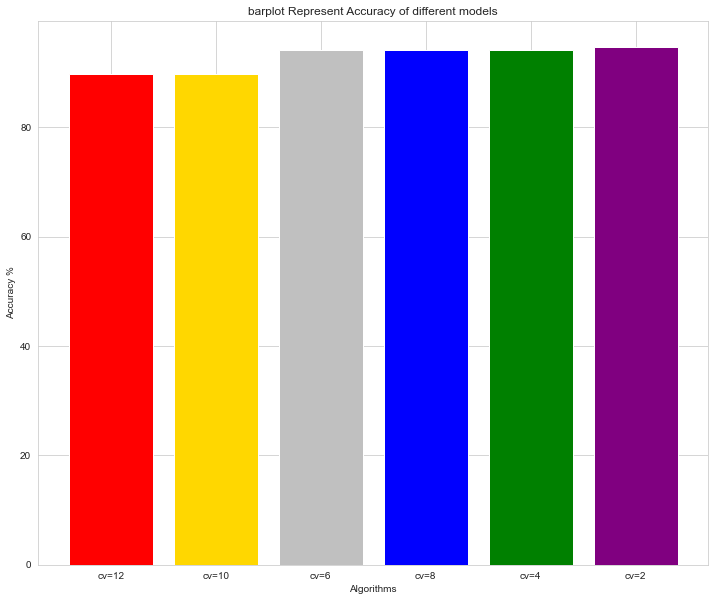

In [45]:
colors = ['red','gold','silver','blue','green','purple']
plt.figure(figsize=(12,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()